# Building a Sudoku Solver in Python

## A program which can solve a Sudoku 

Here are the steps I'll follow to create a Sudoku solver in Python:

* Represent a Sudoku as a list of lists in Python
* Create helper functions to extract rows, columns and boxes from the Sudoku
* Create functions to check if a Sudoku is valid or complete
* Use a recursive strategy to solve a Sudoku by trial & error


### Puzzle Representation

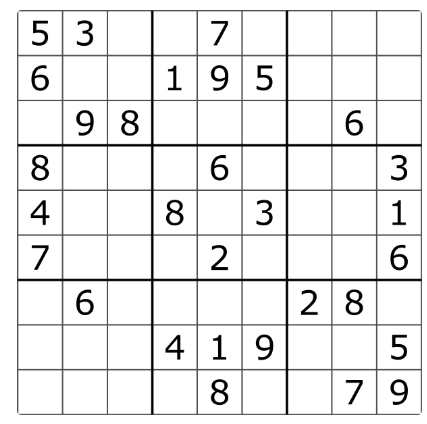

In [1]:
puzzle1 = [[5,3,0,0,7,0,0,0,0],
           [6,0,0,1,9,5,0,0,0],
           [0,9,8,0,0,0,0,6,0],
           [8,0,0,0,6,0,0,0,3],
           [4,0,0,8,0,3,0,0,1],
           [7,0,0,0,2,0,0,0,6],
           [0,6,0,0,0,0,2,8,0],
           [0,0,0,4,1,9,0,0,5],
           [0,0,0,0,8,0,0,7,9]]

In [2]:
puzzle1

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]

In [3]:
len(puzzle1)

9

In [4]:
len(puzzle1[0])

9

In [8]:
puzzle1[0]

[5, 3, 0, 0, 7, 0, 0, 0, 0]

In [10]:
puzzle1[2][2]

8

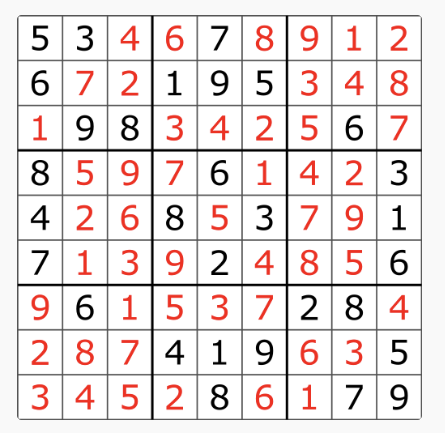

Represent the above solved Sudoku using a list of lists, in a similar fashion as the unsolved Sudoku.

In [11]:
solution1 = [[5,3,4,6,7,8,9,1,2],
           [6,7,2,1,9,5,3,4,8],
           [1,9,8,3,4,2,5,6,7],
           [8,5,9,7,6,1,4,2,3],
           [4,2,6,8,5,3,7,9,1],
           [7,1,3,9,2,4,8,5,6],
           [9,6,1,5,3,7,2,8,4],
           [2,8,7,4,1,9,6,3,5],
           [3,4,5,2,8,6,1,7,9]]

In [12]:
solution1

[[5, 3, 4, 6, 7, 8, 9, 1, 2],
 [6, 7, 2, 1, 9, 5, 3, 4, 8],
 [1, 9, 8, 3, 4, 2, 5, 6, 7],
 [8, 5, 9, 7, 6, 1, 4, 2, 3],
 [4, 2, 6, 8, 5, 3, 7, 9, 1],
 [7, 1, 3, 9, 2, 4, 8, 5, 6],
 [9, 6, 1, 5, 3, 7, 2, 8, 4],
 [2, 8, 7, 4, 1, 9, 6, 3, 5],
 [3, 4, 5, 2, 8, 6, 1, 7, 9]]

In [17]:
len(solution1)== 9 and len(solution1[0]) == 9

True

Retrieve row no. 3 of the solution (counting from 0) using the list indexing notation.

In [14]:
len(solution1)

9

In [19]:
row3 = (solution1[3])

In [20]:
row3 == [8, 5, 9, 7, 6, 1, 4, 2, 3]

True

Retrieve the value in row no. 4 and column no. 5 of the solution (both counting from 0)

In [24]:
type(solution1)

list

In [27]:
val_4_5 = solution1[4][5]
val_4_5

3

In [28]:
val_4_5 == 3

True

Retrieve the value in the last row and column no. 0 of the solution (counting from 0).

In [29]:
val_8_0 = solution1[8][0]
val_8_0

3

In [31]:
val_8_0 == 3

True

### Extracting Rows, Columns and Boxes

 Write a function to extract row no. k (counting from 0) of a Sudoku as a list of numbers. Rows are numbered 0 to 8, starting from the top. E.g. row no. 2 above is [0, 9, 8, 0, 0, 0, 0, 6, 0].

In [32]:
def get_row(sudoku,k):
    return sudoku[k]
    
    

In [33]:
get_row(puzzle1,2)

[0, 9, 8, 0, 0, 0, 0, 6, 0]

In [34]:
get_row(puzzle1, 2)

[0, 9, 8, 0, 0, 0, 0, 6, 0]

In [35]:
get_row(solution1, 3)

[8, 5, 9, 7, 6, 1, 4, 2, 3]

In [36]:
get_row(solution1, 3) == [8, 5, 9, 7, 6, 1, 4, 2, 3]

True

Write a function to extract column no. k of a Sudoku as a list of numbers. Columns are numbered 0 to 8 starting from the left. E.g. column no. 4 above is [7, 9, 0, 6, 0, 2, 0, 1, 8].

In [65]:
#return(sudoku[0][k],sudoku[1][k],sudoku[2][k]...)
def get_col(sudoku, k):
    result=[]
    for i in range (9):
        result.append(sudoku[i][k])    
    return result
    

In [41]:
puzzle1

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]

In [55]:
puzzle1[5][4]

2

In [66]:
get_col(puzzle1,4)

[7, 9, 0, 6, 0, 2, 0, 1, 8]

In [67]:
get_col(puzzle1, 4)

[7, 9, 0, 6, 0, 2, 0, 1, 8]

In [68]:
get_col(solution1, 5)

[8, 5, 2, 1, 3, 4, 7, 9, 6]

In [69]:
get_col(solution1, 5) == [8, 5, 2, 1, 3, 4, 7, 9, 6]

True

Each 3x3 subgrid of the Sudoku is called a box. Write a function to extract the box no. k of a Sudoku as a list of numbers. Boxes are numbered from 0 to 8 as shown above. The numbers in a box are represented as a list, going from left to right and top to bottom. E.g. box no. 0 above is [5, 3, 0, 6, 0, 0, 0, 9, 8].

Hint: Use if-elif-else statements to select the starting index of the box and list concatenation to join the 3 rows in a box into a single row.

In [70]:
puzzle1

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]

In [85]:
def get_box(sudoku, k):
    if k== 0:
        return [sudoku[0][0],sudoku[0][1],sudoku[0][2],
                 sudoku[1][0],sudoku[1][1],sudoku[1][2],
                 sudoku[2][0],sudoku[2][1],sudoku[2][2]]
    elif k== 1:
        return [sudoku[0][3],sudoku[0][4],sudoku[0][5],
                 sudoku[1][3],sudoku[1][4],sudoku[1][5],
                 sudoku[2][3],sudoku[2][4],sudoku[2][5]]
    elif k==2:
        return [sudoku[0][6],sudoku[0][7],sudoku[0][8],
                 sudoku[1][6],sudoku[1][7],sudoku[1][8],
                 sudoku[2][6],sudoku[2][7],sudoku[2][8]]
    elif k==3:
        return [sudoku[3][0],sudoku[3][1],sudoku[3][2],
                 sudoku[4][0],sudoku[4][1],sudoku[4][2],
                 sudoku[5][0],sudoku[5][1],sudoku[5][2]]
    elif k==4:
        return [sudoku[3][3],sudoku[3][4],sudoku[3][5],
                 sudoku[4][3],sudoku[4][4],sudoku[4][5],
                 sudoku[5][3],sudoku[5][4],sudoku[5][5]]
    elif k==5:
        return [sudoku[3][6],sudoku[3][7],sudoku[3][8],
                 sudoku[4][6],sudoku[4][7],sudoku[4][8],
                 sudoku[5][6],sudoku[5][7],sudoku[5][8]]
    elif k==6:
        return [sudoku[6][0],sudoku[6][1],sudoku[6][2],
                 sudoku[7][0],sudoku[7][1],sudoku[7][2],
                 sudoku[8][0],sudoku[8][1],sudoku[8][2]]
    elif k==7:
        return [sudoku[6][3],sudoku[6][4],sudoku[6][5],
                 sudoku[7][3],sudoku[7][4],sudoku[7][5],
                 sudoku[8][3],sudoku[8][4],sudoku[8][5]]
    else:
        return [sudoku[6][6],sudoku[6][7],sudoku[6][8],
                 sudoku[7][6],sudoku[7][7],sudoku[7][8],
                 sudoku[8][6],sudoku[8][7],sudoku[8][8]]
    
        
    

In [81]:
get_box(puzzle1, 1)

[0, 7, 0, 1, 9, 5, 0, 0, 0]

In [83]:
[puzzle1[3][0],puzzle1[3][1],puzzle1[3][2],
 puzzle1[4][0],puzzle1[4][1],puzzle1[4][2],
 puzzle1[5][0],puzzle1[5][1],puzzle1[5][2]]

[8, 0, 0, 4, 0, 0, 7, 0, 0]

In [ ]:
[sudoku[3][0],sudoku[3][1],sudoku[3][2],
 sudoku[4][0],sudoku[4][1],sudoku[4][2],
 sudoku[5][0],sudoku[5][1],sudoku[5][2]]

In [75]:
puzzle1[0][1]

3

In [86]:
get_box(puzzle1, 0)

[5, 3, 0, 6, 0, 0, 0, 9, 8]

In [87]:
get_box(solution1, 7)

[5, 3, 7, 4, 1, 9, 2, 8, 6]

In [88]:
get_box(solution1, 7) == [5, 3, 7, 4, 1, 9, 2, 8, 6]

True

Write a function which finds the row & column index of the first empty position (indicated by 0) within a Sudoku. If the row no. i and column no. j column is the first empty position, the function should return the tuple i, j. If there are no empty positions, return None, None.

In [91]:
def first_empty_position(sudoku):
    for i in range(9):
        for j in range(9):
            if sudoku[i][j] == 0:
                return i,j
        return None, None
    

In [92]:
first_empty_position(puzzle1)

(0, 2)

In [93]:
first_empty_position(solution1)

(None, None)

In [94]:
first_empty_position(puzzle1) == (0, 2)

True

In [95]:
first_empty_position(solution1) == (None, None)

True

### Sudoku Validations

 Write a function to check if a list of 9 numbers (containing digits from 1 to 9 and 0s to indicate blank spaces) is a valid section (row, column or box) for a Sudoku. Only 0 can occur more than once, the numbers 1 to 9 can occur at most once. Your function should return True if the section is valid and False otherwise.

Hint: You may find the count method of a list useful.

In [102]:
nums = [5, 3, 7, 7, 1, 7, 2, 8, 6]
nums.count(7)

3

In [103]:
for x in range(1,10):
    print(x)

1
2
3
4
5
6
7
8
9


In [104]:
def is_section_valid(nums):
    for digit in range(1,10):
        if nums.count(digit) >1:
            return False
    return True   

In [105]:
# should return True
is_section_valid([5, 3, 7, 4, 1, 9, 2, 8, 6])

True

In [106]:
# should return True
is_section_valid([5, 3, 0, 6, 0, 0, 0, 9, 8])

True

In [107]:
# should return False
is_section_valid([5, 3, 0, 6, 0, 8, 0, 9, 8])

False

In [108]:
col4 = get_col(puzzle1,4)
is_section_valid(col4)

True

### Complete/Solved Sudoku

Write a function to check if a list of 9 numbers (containing digits from 1 to 9) represents a complete section (row, column or box) for a Sudoku. The list should contain all the numbers from 1 to 9 exactly once. Your function should return True if the section is complete and False otherwise.

Hint: You may find the count method of a list useful.

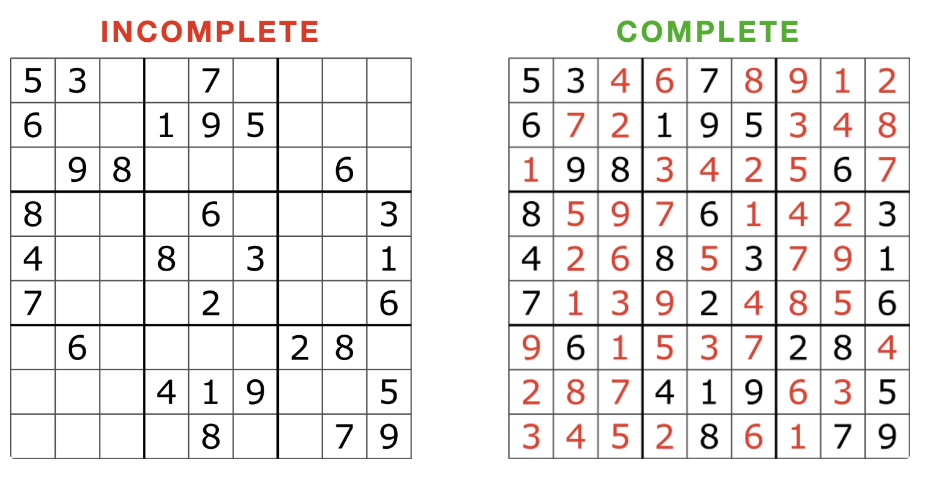

In [109]:
def is_section_complete(nums):
    for digit in range (1,10):
        if nums.count(digit) != 1:
            return False 
        return True 
    
    

In [110]:
# should return False
is_section_complete([0, 9, 8, 0, 0, 0, 0, 6, 0])

False

In [111]:
# should return True
is_section_complete([1, 9, 8, 3, 4, 2, 5, 6, 7])

True

In [113]:
is_section_complete(get_col(solution1,5))

True

In [114]:
is_section_complete(get_col(puzzle1,5))

False